In [25]:
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import linalg as LA

###

C = 20 #micro F/cm^2
V_K = - 84 #mV
g_K = 8 #mS/cm^2
V_Ca = 120 #mV
g_Ca = 4.4 #mS/cm^2
V_L = -60 #mV
g_L = 2 #mS/cm^2
v1 = -1.2 #mV
v2 = 18 #mV
v3 = 2 #mV
v4 = 30 #mV
phi = 0.04 #per ms


In [15]:
def f(x, I_app=300):
    V, w = x

    
    m_inf = 0.5*(1 + np.tanh((V - v1)/v2))
    w_inf = 0.5*(1 + np.tanh((V - v3)/v4))
    tau = 1/np.cosh((V - v3)/(2*v4))

    
    dxdt = [
        (- g_Ca * m_inf * (V - V_Ca) - g_K * w * ( V - V_K) - g_L *(V - V_L) + I_app)/C,
        
        phi * (w_inf - w)/ tau
    ]
    
    return dxdt


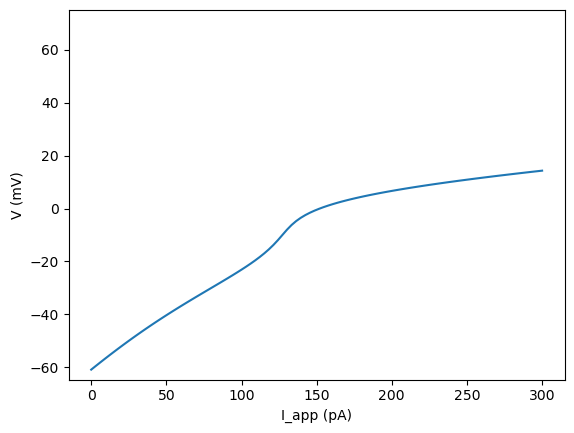

In [27]:
length = 100
I_app = np.linspace(0, 300, length)
V = np.zeros(length)
w = np.zeros(length)

for i in range(len(I_app)):
    sol = fsolve(f, [1,1], args=(I_app[i],))
    V[i], w[i] = sol
    
fig, ax = plt.subplots()

ax.plot(I_app, V,)
plt.ylim(top = 75)

plt.xlabel("I_app (pA)")
plt.ylabel("V (mV)")
plt.show()

## Linearising
Now Moving onto linearising the non-linear system

In [30]:
J=optimize.approx_fprime([V[-1], w[-1]], f)

eigenvalues, eigenvectors = LA.eig(J)
print(eigenvalues)



[-0.13648842+0.11652587j -0.13648842-0.11652587j]
